In [11]:
import os

os.chdir("/Users/maciej.filanowicz/Desktop/token_classification")

In [12]:
from hydra import initialize, compose
from src.data import TrainingDocumentWarehouse, DocumentWarehouse
from src.inference import InferencePipeline
from src.utils import visualize_predictions
import torch
from transformers import LayoutLMv3Processor

In [13]:
initialize(version_base="1.2", config_path="../conf", job_name="test_app")
cfg = compose(config_name="config2", return_hydra_config=True)

ValueError: GlobalHydra is already initialized, call GlobalHydra.instance().clear() if you want to re-initialize

In [ ]:
device = torch.device('cpu')

In [ ]:
processor = LayoutLMv3Processor.from_pretrained(cfg.model.pretrained_model_name,
                                                apply_ocr=False)

In [ ]:
# with open('datasets/FUNSD/annotations/00070353.json','r') as fp:
#     document = json.load(fp)
# document_image = Image.open('datasets/FUNSD/images/00070353.png').convert('RGB')
# with open('datasets/FUNSD/annotations/01122115.json', 'r') as fp:
#     document = json.load(fp)
# document_image = Image.open('datasets/FUNSD/images/01122115.png').convert('RGB')
# with open('datasets/FUNSD/annotations/0000971160.json', 'r') as fp:
#     document = json.load(fp)
# document_image = Image.open('datasets/FUNSD/images/0000971160.png').convert('RGB')

In [ ]:
document_warehouse = TrainingDocumentWarehouse(image_dir="datasets/FUNSD/images",
                                               annotation_dir="datasets/FUNSD/annotations")


In [ ]:
images_to_predict = document_warehouse.images_list[:6]
annotations_to_predict = document_warehouse.annotations_list[:6]
document_warehouse = DocumentWarehouse(images_list=images_to_predict,
                                       annotations_list=annotations_to_predict)
model_inputs = document_warehouse.get_all_data().to_dict(orient="list")

In [ ]:
inference_pipeline = InferencePipeline(model_path='models/model.pth',
                                       processor=processor,
                                       device=device,
                                       id2label=cfg.dataset.id2label)
processed_outputs = inference_pipeline.predict(images_to_predict, annotations_to_predict)

367
280
380
217
422
323


/Users/maciej.filanowicz/opt/anaconda3/envs/nlp/lib/python3.9/site-packages/transformers/modeling_utils.py:812: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


{'text': 'R&D', 'scores': array([0.99813914, 0.99726033, 0.99685776], dtype=float32), 'labels': ['other', 'other', 'other'], 'coordinates': array([292.,  91., 376., 175.], dtype=float32)}
{'text': ':', 'scores': array([0.99003965], dtype=float32), 'labels': ['S-question'], 'coordinates': array([219., 316., 225., 327.], dtype=float32)}
{'text': 'Suggestion:', 'scores': array([0.9948095, 0.9947149, 0.9489732], dtype=float32), 'labels': ['S-question', 'S-question', 'S-question'], 'coordinates': array([ 95., 355., 169., 370.], dtype=float32)}
{'text': 'Date:', 'scores': array([0.9955226, 0.8230285], dtype=float32), 'labels': ['S-question', 'S-question'], 'coordinates': array([482., 268., 518., 282.], dtype=float32)}
{'text': 'Licensee', 'scores': array([0.97296673, 0.969934  ], dtype=float32), 'labels': ['S-answer', 'S-answer'], 'coordinates': array([511., 309., 570., 323.], dtype=float32)}
{'text': 'Yes', 'scores': array([0.9959436], dtype=float32), 'labels': ['S-question'], 'coordinates'

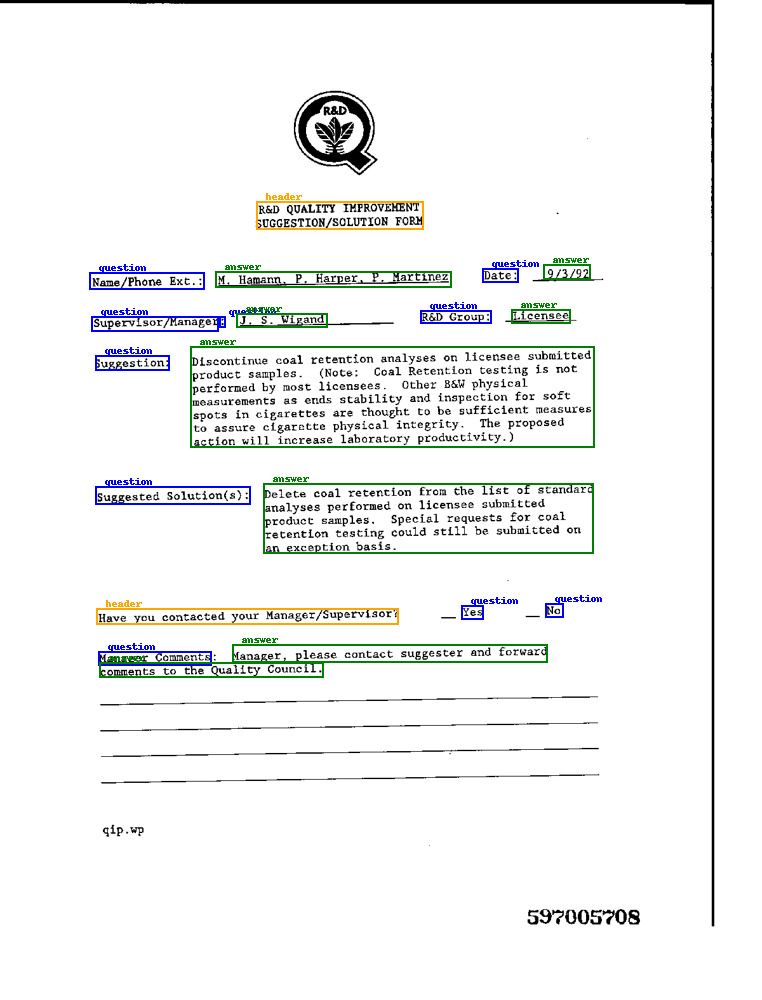

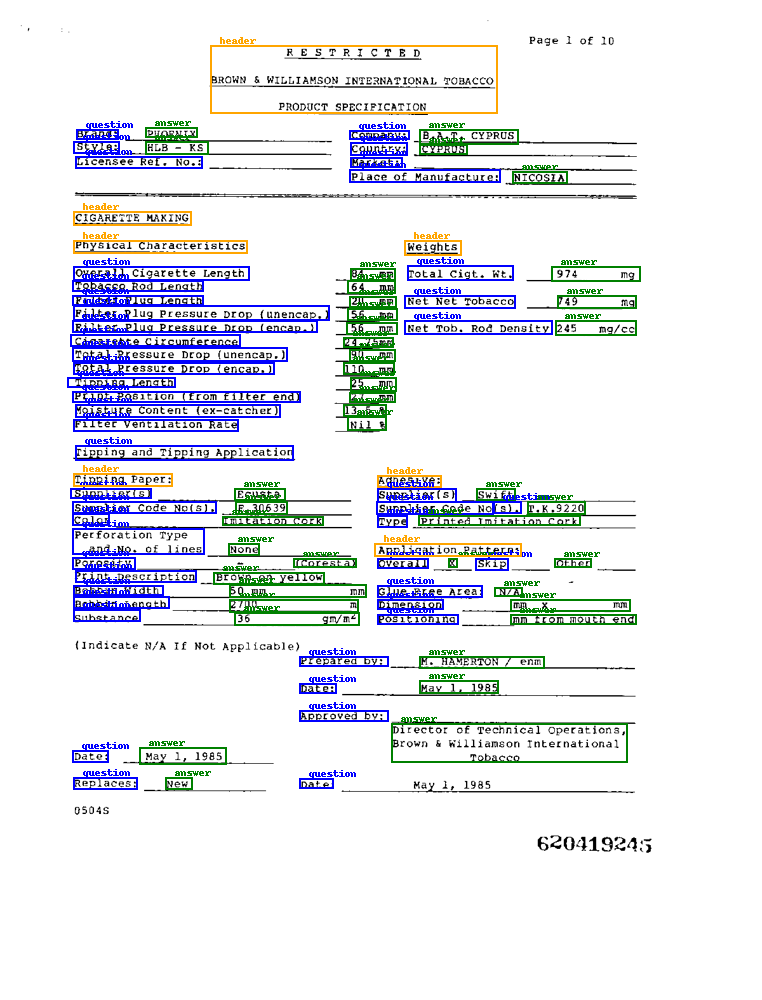

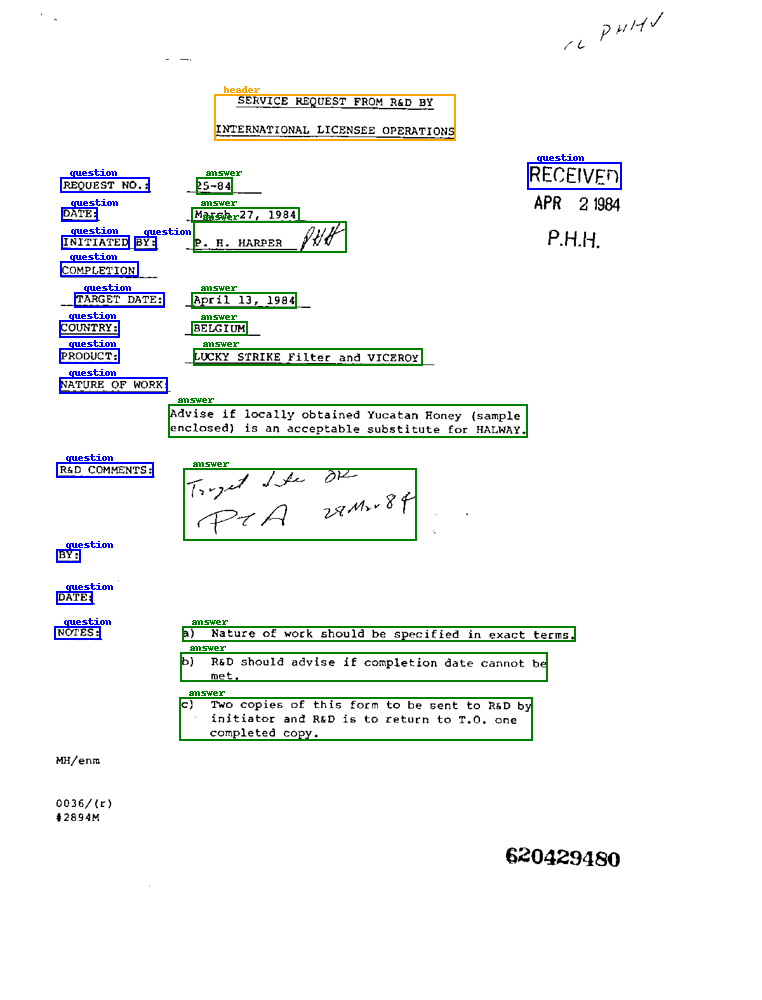

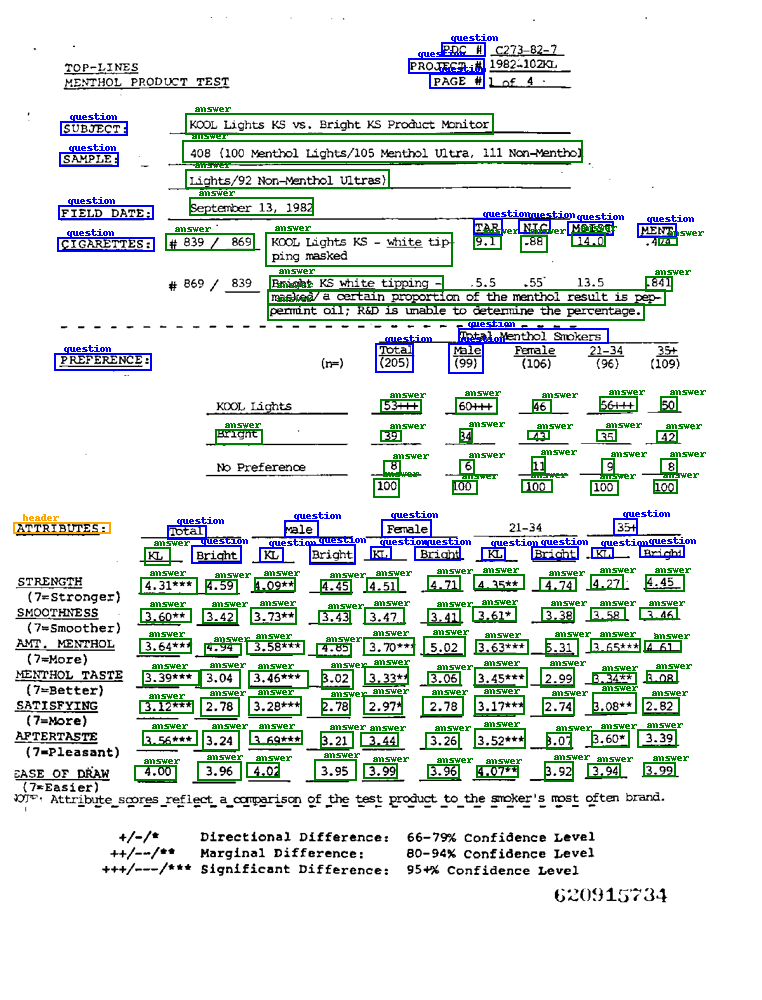

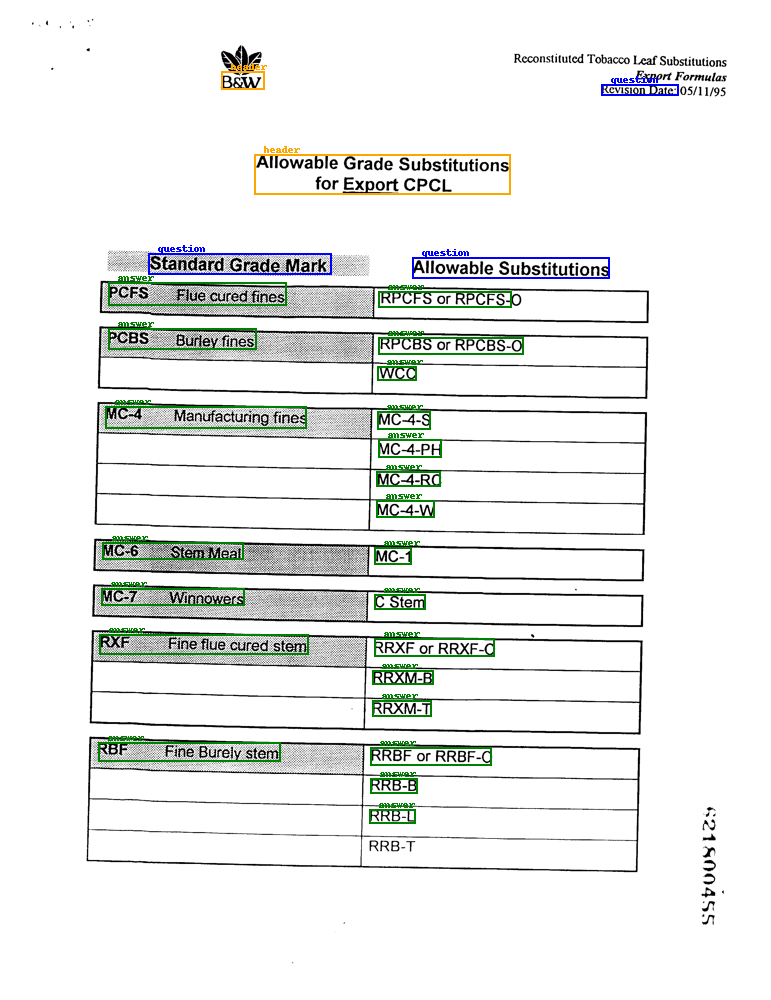

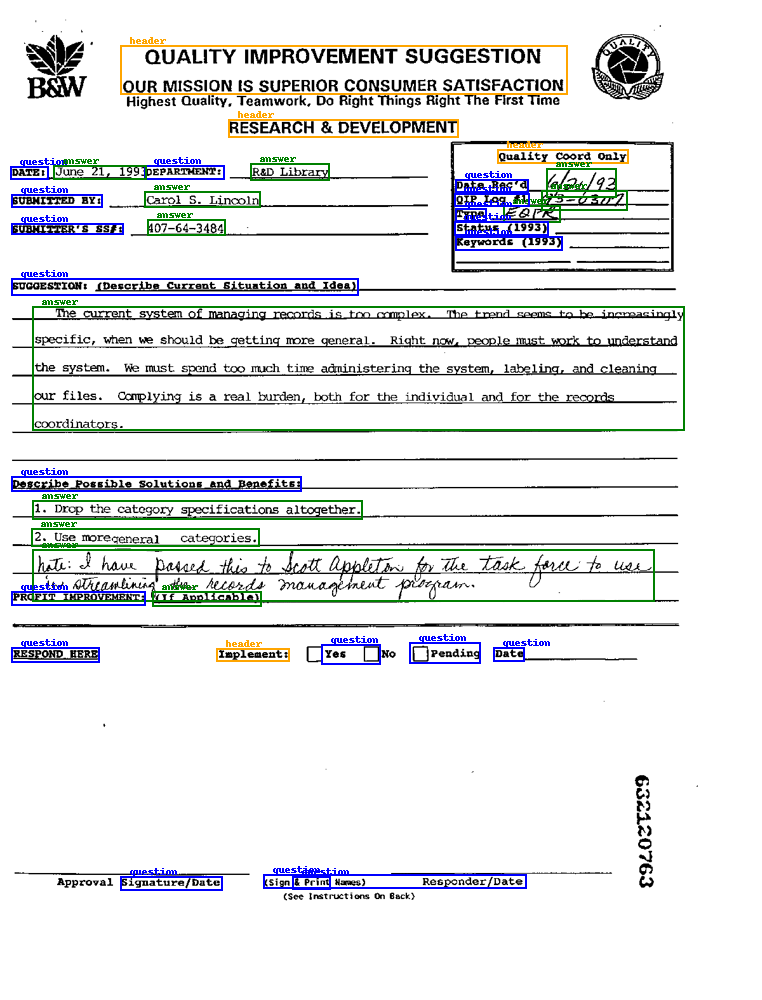

In [ ]:
for document_image, processed_output in zip(images_to_predict, processed_outputs):
    display(visualize_predictions(document_image, processed_output))